<h1>Dimensionality Reduction</h1>

In [31]:
import pandas as pd
import numpy as np

import sklearn
from sklearn import datasets
from sklearn import decomposition
from sklearn.decomposition import FactorAnalysis
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import pylab as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sns.set_style('whitegrid')

<h2>Exploratoy Factor Analysis</h2>

In [37]:
iris = datasets.load_iris()
x = iris.data
variable_names = iris.feature_names

x[0:10,]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [38]:
factor = FactorAnalysis().fit(x)
pd.DataFrame(factor.components_,columns=variable_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.706989,-0.158005,1.654236,0.70085
1,0.115161,0.159635,-0.044321,-0.01403
2,-0.000000,0.000000,0.000000,0.00000
3,-0.000000,0.000000,0.000000,-0.00000


<h3>Singular Value Decomposition</h3>
    <p>
    A linear algebra method that decomposes a matrix into three resultant matrices to reduce 
    information redundancy and noise. 
   </p>
   <p>
    Most commonly used for Principal Component Anlaysis.
   </p>

<h4>Anatomy of SVD</h4>

<p><b>A</b> is the original matrix, <b>U</b> is the left orthognal marix composed of all the 
    nonredundant information on features and <b>V</b> is the right orthognal marix composed of all the 
    nonredundant information on observations. <b>S</b> is the diagonal matrix which contains all of the 
information about the decomposition process prerformed during the compression.
</p>

<h2>Principal Component Anlaysis</h2>

<p>
    <b>Definition 1</b>: An unsupervised ml algorithms that discovers relationships between variables and 
reduces said variables to a set of uncorrelated syntheic reprensetaions called 
principal components
</p>

<p>
    <b>Definition 2</b>: Uncorrelated features that embody a dataset's important information (it's variance)
with redunancy, noise, and outliers stripped out
</p>

<h3>PCA Use Cases</h3>

<p>
    <ul>
        <li>Fraud detection</li>
        <li>Space detection</li>
        <li>Image recognition</li>
        <li>Speech recognition<li>
    </ul>
</p>

In [32]:
pca = decomposition.PCA() 
iris_pca = pca.fit_transform(x)

pca.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])

<p><b>Culmative Variance</b></p>

In [35]:
pca.explained_variance_ratio_.sum()

1.0

<p><b>Explained Variance Ratio</b> tells you how much information is compressed into the first few components. You use explained ratio variance to calculate a cumulative variance. Then, with this cumulative variance, you can figure out how many components to keep. You just need to make sure that you keep at least 70% of the data set's original information.</p>

In [40]:
comps = pd.DataFrame(pca.components_, columns=variable_names)
comps

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.361387,-0.084523,0.856671,0.358289
1,0.656589,0.730161,-0.173373,-0.075481
2,-0.582030,0.597911,0.076236,0.545831
3,-0.315487,0.319723,0.479839,-0.753657


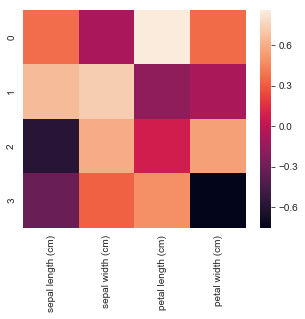

In [41]:
sns.heatmap(comps)